In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df1 = pd.read_csv("Portmap.csv")
df2 = pd.read_csv("UDPLag.csv")

C:\Users\athletino\AppData\Local\Temp\ipykernel_9348\4029824558.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("Portmap.csv")
C:\Users\athletino\AppData\Local\Temp\ipykernel_9348\4029824558.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("UDPLag.csv")


In [6]:
data = [df1, df2]
data = pd.concat(data)

In [9]:
data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 09:18:16.964447,114456999,45,...,28337.112288,98168.0,3.0,9529897.25,351582.631269,10001143.0,9048097.0,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 09:18:18.506537,114347504,56,...,121314.911865,420255.0,4.0,9493929.75,351541.079539,9978130.0,8820294.0,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,2018-11-03 09:18:18.610576,36435473,6,...,0.000000,62416.0,62416.0,36373056.00,0.000000,36373056.0,36373056.0,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,2018-11-03 09:18:18.610579,36434705,6,...,0.000000,62413.0,62413.0,36372291.00,0.000000,36372291.0,36372291.0,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,2018-11-03 09:18:18.610581,36434626,6,...,0.000000,62409.0,62409.0,36372216.00,0.000000,36372216.0,36372216.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725160,587239,172.16.0.5-192.168.50.4-38133-51501-6,172.16.0.5,38133,192.168.50.4,51501,6,2018-11-03 11:30:25.829961,1,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,Syn
725161,240180,172.16.0.5-192.168.50.4-38134-22514-6,172.16.0.5,38134,192.168.50.4,22514,6,2018-11-03 11:30:25.830168,1,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,Syn
725162,12919,172.16.0.5-192.168.50.4-38135-54928-6,172.16.0.5,38135,192.168.50.4,54928,6,2018-11-03 11:30:25.830169,105,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,Syn
725163,500419,172.16.0.5-192.168.50.4-38136-50486-6,172.16.0.5,38136,192.168.50.4,50486,6,2018-11-03 11:30:25.830219,1,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,Syn


In [30]:
data[" Label"].value_counts()
#data.columns

Syn        606749
Portmap    186960
UDP        112475
BENIGN       8802
UDPLag       1873
Name:  Label, dtype: int64

<AxesSubplot:ylabel=' Label'>

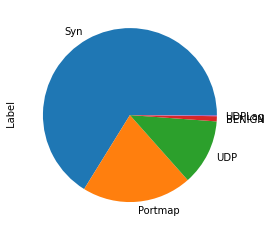

In [31]:
data[' Label'].value_counts(normalize = True).plot.pie()

In [33]:
data.describe(include='object')

,Flow ID,Source IP,Destination IP,Timestamp,SimillarHTTP,Label
count,916859,916859,916859,916859,916859,916859
unique,912452,321,357,916823,86,5
top,192.168.50.254-224.0.0.5-0-0-0,172.16.0.5,192.168.50.4,2018-11-03 09:38:23.186376,0,Syn
freq,37,906547,906553,2,875899,606749


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data.astype(str) 
for i in data:
    data[i] = le.fit_transform(data[i])
data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,61733,887061,273,0,20,0,0,0,91257,141,...,21867,10869,917,9597,59178,67346,19382,0,0,0
1,86423,887060,272,0,20,0,0,1,91251,5,...,22802,5373,1041,8609,59166,66692,17576,0,0,0
2,594302,886452,276,38536,256,31117,1,12352,13922,147,...,0,9437,1269,59905,0,58087,58664,0,0,0
3,392130,886872,276,38538,246,31117,1,135808,13921,147,...,0,9413,1267,59904,0,58086,58663,0,0,0
4,551789,886453,276,38539,256,31117,1,259264,13919,147,...,0,9400,1266,59903,0,58085,58662,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725160,490424,124121,188,17961,323,40126,1,897311,1,1,...,0,0,0,0,0,0,0,0,1,2
725161,61959,124127,188,17962,323,4342,1,897312,1,1,...,0,0,0,0,0,0,0,0,1,2
725162,249292,124154,188,17963,323,44355,1,897315,50890,1,...,0,0,0,0,0,0,0,0,1,2
725163,383241,124169,188,17964,323,38872,1,897316,1,1,...,0,0,0,0,0,0,0,0,1,2


In [44]:
from sklearn.feature_selection import VarianceThreshold
y = data[' Label']
X = data.drop(' Label', axis=1)

In [45]:
X.var(axis=0) #variance of each variable

Unnamed: 0         3.484106e+10
Flow ID            6.988158e+10
 Source IP         8.858560e+01
 Source Port       2.793199e+08
 Destination IP    2.958768e+02
                       ...     
 Idle Std          9.674698e+07
 Idle Max          1.081700e+08
 Idle Min          1.079587e+08
SimillarHTTP       5.592043e-01
 Inbound           9.281176e-03
Length: 87, dtype: float64

In [76]:
selector = VarianceThreshold(threshold=10)
X_selected = selector.fit_transform(X)
print(X_selected.shape)
selected_indices = selector.get_support(indices=True) #boolean Array

(916859, 64)


In [77]:
selected_feature_names = np.array(X.columns)[selected_indices] #boolean indexing
selected_feature_names

array(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std',
       'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max',
       ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length',
       'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std',
       ' Pa

In [81]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4



In [ ]:
pip install tensorflow

In [80]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)